# Natural Language Processing   

Mini-Challenge 1 (LE3-LE5)   
Yannic & Ben  


# Aufgabe

You evaluate 2 different classification systems on a text classification task (examples below). You argument why you chose these systems for that case and you build, train and evaluate the system. You also do a thorough error analysis and propose theories on how to improve the systems, especially also by analysing individual cases and comparing the predictions of each system. At least one of the systems is based on a fine-tuned deep learning model.

Here you can use data from shared tasks, such as semeval, kaggle, codalab or paperwithcode for text classification.

You can submit as a group of 2 but each one has to have a significant contribution. Submission is given as a gitlab repo. I will track with the commit history if there was  a significant contribution from each participant. The repo should include the report, a python notebook to reproduce the results and a wiki with a journal or git issues that document the progress of your mini-challenge.

Since many parts of code can be online, the most important part of the submission will be the report and evaluation of the results. In the report you describe which system you used, which are the theory behind it and why you chose it. The evaluation you describe the metric chose, why this metric is good for the use case and discuss the results of the experiments and some predictions on individual test samples. Bonus points will be given if you show, that you implemented the systems yourself, and the progress/errors are documented through commits.

ADDENDUM: The classification systems can be for example tf-idf-svm, cnns or transformers, see https://gitlab.fhnw.ch/fernando.benites/npr-21-fs/-/tree/master/text_classification/20news_group for an applied example. There are other ways to go, and I am open for suggestions. Please try to understand the systems, this can be handy in the error analysis/evaluation/report or in the exam. Don't use the 20newsgroup dataset. The repo will be used in the deep dive and so this dataset is already "taken". If you receive a 404 on the repo, please contact me, I'll add you to the repo, then it should work.

Some other starting points:

https://lionbridge.ai/articles/using-deep-learning-for-end-to-end-multiclass-text-classification/

BETTER: https://medium.com/analytics-vidhya/sentiment-analysis-on-amazon-reviews-using-tf-idf-approach-c5ab4c36e7a1

GOOD: https://colab.research.google.com/github/patrickvankessel/AAPOR-Text-Analysis-2019/blob/master/Tutorial.ipynb#scrollTo=9wJQJUDHkM5w

BAD: https://medium.com/@qempsil0914/machine-learning-nlp-text-classification-with-amazon-review-data-using-python3-step-by-step-3fb0cc0cecc1

https://paperswithcode.com/task/text-classification

https://fbenites.github.io/GermEval/

https://medium.com/analytics-vidhya/fine-tuning-bert-language-model-to-get-better-results-on-text-classification-3dac5e3c348e

https://github.com/Shivampanwar/Bert-text-classification/blob/master/bert_language_model_with_sequence_classification.ipynb


# Installing Packages

In [44]:
# Datamanipulation
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import json

# Read Dataset

In [91]:
# Read booksumaries.txt Dataset
df = pd.read_csv('data/booksummaries.txt', 
                 sep="\t", 
                 header=None, 
                 names=["Wikipedia ID", "Freebase ID", "Book Title", "Book Author", "Pub date","Genres","Summary"],
                 dtype={"Wikipedia ID": np.int32, "Freebase ID": str, "Book Title": str, "Book Author": str, "Pub date": str, "Genres": str, "Summary": str})

display(df.info())
display(df.head())

def extract_genres(genre_str: str):
    try:
        genre_data = json.loads(genre_str)
        return list(genre_data.values())
    except:
        (json.decoder.JSONDecodeError, TypeError)
        return np.nan

# apply extract_genres function to the Genres column
df['Genres'] = df['Genres'].apply(extract_genres)
display(df.head())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16559 entries, 0 to 16558
Data columns (total 7 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   Wikipedia ID  16559 non-null  int32 
 1   Freebase ID   16559 non-null  object
 2   Book Title    16559 non-null  object
 3   Book Author   14177 non-null  object
 4   Pub date      10949 non-null  object
 5   Genres        12841 non-null  object
 6   Summary       16559 non-null  object
dtypes: int32(1), object(6)
memory usage: 841.0+ KB


None

,Wikipedia ID,Freebase ID,Book Title,Book Author,Pub date,Genres,Summary
0,620,/m/0hhy,Animal Farm,George Orwell,1945-08-17,"{""/m/016lj8"": ""Roman \u00e0 clef"", ""/m/06nbt"":...","Old Major, the old boar on the Manor Farm, ca..."
1,843,/m/0k36,A Clockwork Orange,Anthony Burgess,1962,"{""/m/06n90"": ""Science Fiction"", ""/m/0l67h"": ""N...","Alex, a teenager living in near-future Englan..."
2,986,/m/0ldx,The Plague,Albert Camus,1947,"{""/m/02m4t"": ""Existentialism"", ""/m/02xlf"": ""Fi...",The text of The Plague is divided into five p...
3,1756,/m/0sww,An Enquiry Concerning Human Understanding,David Hume,NaN,NaN,The argument of the Enquiry proceeds by a ser...
4,2080,/m/0wkt,A Fire Upon the Deep,Vernor Vinge,NaN,"{""/m/03lrw"": ""Hard science fiction"", ""/m/06n90...",The novel posits that space around the Milky ...


,Wikipedia ID,Freebase ID,Book Title,Book Author,Pub date,Genres,Summary
0,620,/m/0hhy,Animal Farm,George Orwell,1945-08-17,"[Roman à clef, Satire, Children's literature, ...","Old Major, the old boar on the Manor Farm, ca..."
1,843,/m/0k36,A Clockwork Orange,Anthony Burgess,1962,"[Science Fiction, Novella, Speculative fiction...","Alex, a teenager living in near-future Englan..."
2,986,/m/0ldx,The Plague,Albert Camus,1947,"[Existentialism, Fiction, Absurdist fiction, N...",The text of The Plague is divided into five p...
3,1756,/m/0sww,An Enquiry Concerning Human Understanding,David Hume,NaN,NaN,The argument of the Enquiry proceeds by a ser...
4,2080,/m/0wkt,A Fire Upon the Deep,Vernor Vinge,NaN,"[Hard science fiction, Science Fiction, Specul...",The novel posits that space around the Milky ...


In [123]:
# drop rows that contains NaN Values for Genres and Summary
df_clean = df.dropna(subset=['Genres', 'Summary'])
display(df_clean.info())

# display the cleaned dataframe
display(df_clean.head())

# calculate the number of dropped rows 
print("Number of dropped rows: ", df.shape[0] - df_clean.shape[0])
# calculate the relative number of dropped rows in percent and round to 2 decimal places
print("Relative number of dropped rows in percent: ", round(((df.shape[0] - df_clean.shape[0]) / df.shape[0]) * 100, 2), "%")
print("Number of unique genres: ", df_clean['Genres'].explode().nunique())

<class 'pandas.core.frame.DataFrame'>
Index: 12841 entries, 0 to 16558
Data columns (total 7 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   Wikipedia ID  12841 non-null  int32 
 1   Freebase ID   12841 non-null  object
 2   Book Title    12841 non-null  object
 3   Book Author   12055 non-null  object
 4   Pub date      9671 non-null   object
 5   Genres        12841 non-null  object
 6   Summary       12841 non-null  object
dtypes: int32(1), object(6)
memory usage: 752.4+ KB


None

,Wikipedia ID,Freebase ID,Book Title,Book Author,Pub date,Genres,Summary
0,620,/m/0hhy,Animal Farm,George Orwell,1945-08-17,"[Roman à clef, Satire, Children's literature, ...","Old Major, the old boar on the Manor Farm, ca..."
1,843,/m/0k36,A Clockwork Orange,Anthony Burgess,1962,"[Science Fiction, Novella, Speculative fiction...","Alex, a teenager living in near-future Englan..."
2,986,/m/0ldx,The Plague,Albert Camus,1947,"[Existentialism, Fiction, Absurdist fiction, N...",The text of The Plague is divided into five p...
4,2080,/m/0wkt,A Fire Upon the Deep,Vernor Vinge,NaN,"[Hard science fiction, Science Fiction, Specul...",The novel posits that space around the Milky ...
5,2152,/m/0x5g,All Quiet on the Western Front,Erich Maria Remarque,1929-01-29,"[War novel, Roman à clef]","The book tells the story of Paul Bäumer, a Ge..."


Number of dropped rows:  3718
Relative number of dropped rows in percent:  22.45 %
Number of unique genres:  227


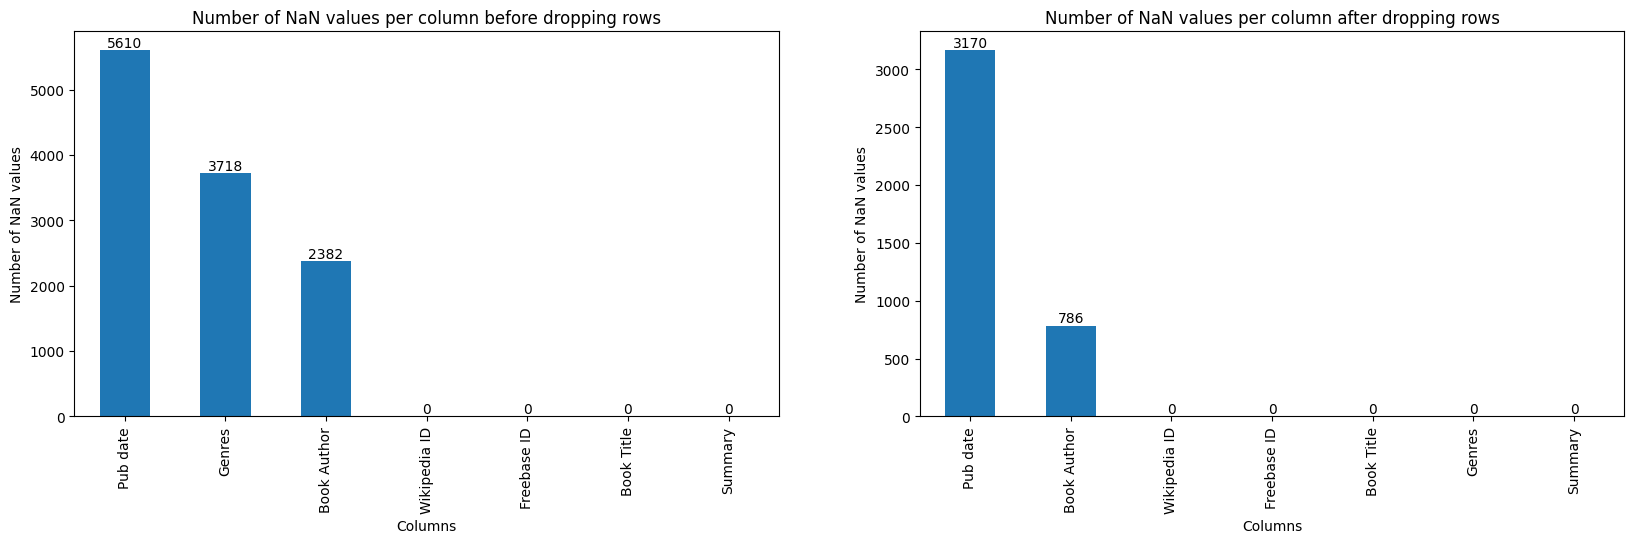

In [89]:
# drop rows that contains NaN Values for Genres and Summary
df_clean = df.dropna(subset=['Genres', 'Summary'])

# make both plots in one figure
fig, axes = plt.subplots(1, 2, figsize=(20, 5))
df.isna().sum().sort_values(ascending=False).plot(kind='bar', ax=axes[0])
for index, value in enumerate(df.isna().sum().sort_values(ascending=False)):
    axes[0].text(index, value, str(value), ha='center', va='bottom', fontsize=10)
axes[0].set_title('Number of NaN values per column before dropping rows')
axes[0].set_xlabel('Columns')
axes[0].set_ylabel('Number of NaN values')
df_clean.isna().sum().sort_values(ascending=False).plot(kind='bar', ax=axes[1])
for index, value in enumerate(df_clean.isna().sum().sort_values(ascending=False)):
    axes[1].text(index, value, str(value), ha='center', va='bottom', fontsize=10)
axes[1].set_title('Number of NaN values per column after dropping rows')
axes[1].set_xlabel('Columns')
axes[1].set_ylabel('Number of NaN values')
plt.show()

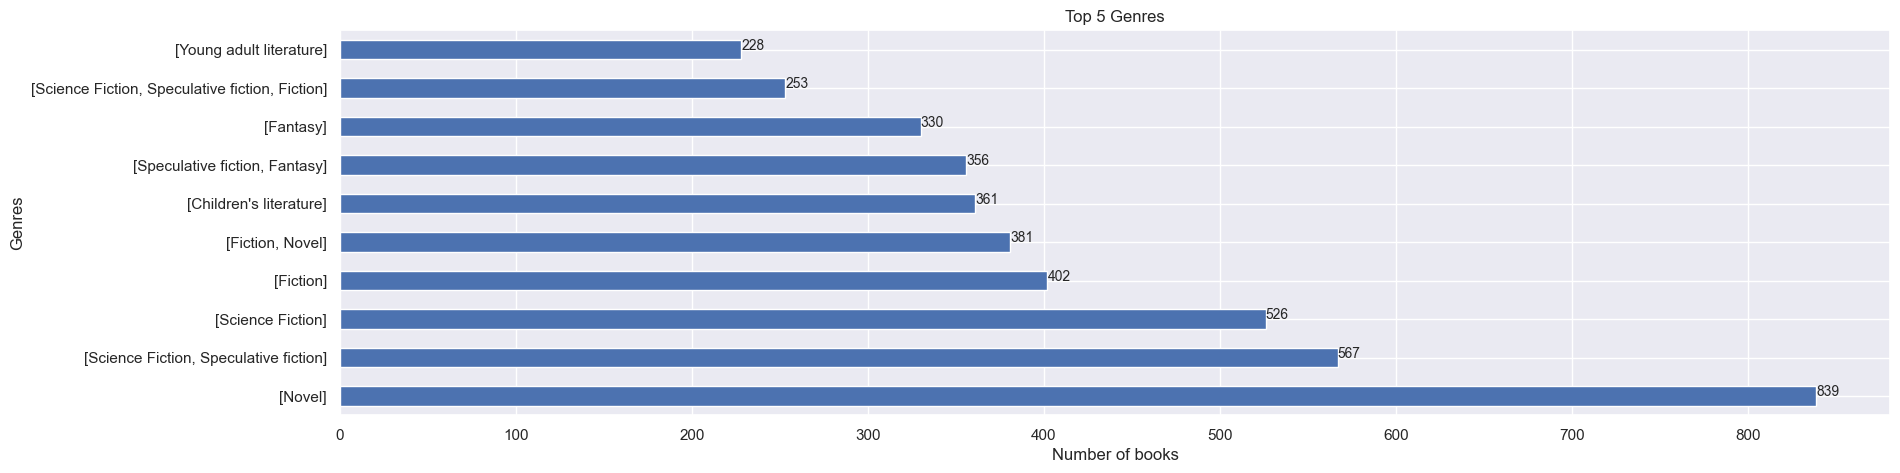

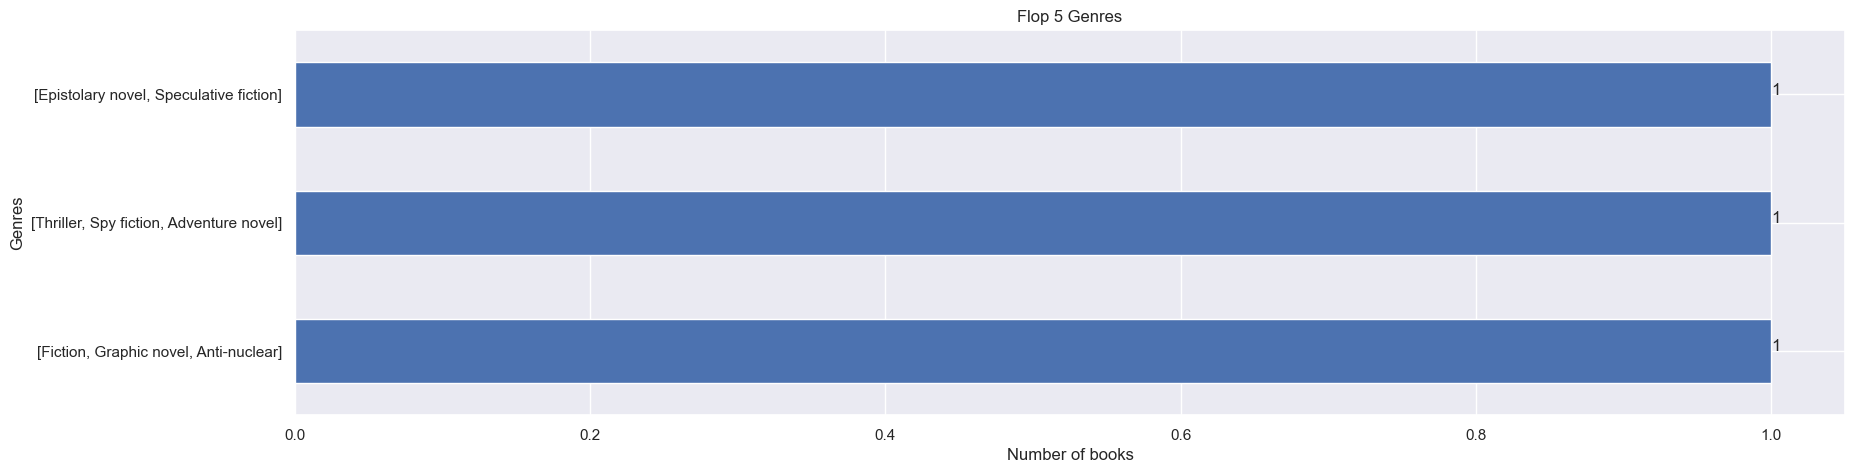

In [129]:
# Top 10 Genres
df_clean["Genres"].value_counts().head(n=10).plot(kind='barh', figsize=(20, 5))
# add number to the bars
for index, value in enumerate(df_clean["Genres"].value_counts().head(n=10)):
    plt.text(value, index, str(value), fontsize=10)
plt.title('Top 5 Genres')
plt.xlabel('Number of books')
plt.ylabel('Genres')
plt.show()

# Flop 3 Genres
df_clean["Genres"].value_counts().tail(3).plot(kind='barh', figsize=(20, 5))
# add number to the bars
for index, value in enumerate(df_clean["Genres"].value_counts().tail(3)):
    plt.text(value, index, str(value))
plt.title('Flop 5 Genres')
plt.xlabel('Number of books')
plt.ylabel('Genres')
plt.show()


# Data NLP Pre-processing

# Feature Extraction

# Predictions

# Evaluation